<a href="https://colab.research.google.com/github/hyunalim/KDT_DATA_Analysis/blob/main/11%EC%A3%BC%EC%B0%A8/%EA%B3%A0%EA%B0%9D%EB%8C%80%EC%B6%9C%EB%93%B1%EA%B8%89%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##데이터 전처리
- 근로기간, 대출기간 숫자형으로 변환
- 대출등급 숫자형 변환

In [1]:
# 폰트 다운로드
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
#폰트 다운로드 확인
import matplotlib.font_manager as fm
font_list = fm.findSystemFonts(fontpaths = None, fontext = 'ttf')
font_list[:]

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 33 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

['/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationMono-Italic.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSans-Italic.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSerif-BoldItalic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundR.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Regular.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareR.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationMono-Bold.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSans-Regular.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationMono-Regular.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicCoding.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationMono-BoldItalic.ttf',
 '/usr/share/fonts/truetype/liberation/Liberati

In [2]:
# 데이터 가져오기
from google.colab import drive
drive.mount('/content/drive')

# 파일 경로
file_path = '/content/drive/MyDrive/3rd/train.csv'

# 파일 읽기
import pandas as pd
data = pd.read_csv(file_path)

# 데이터 확인
print(data.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
            ID      대출금액        대출기간       근로기간    주택소유상태       연간소득  \
0  TRAIN_00000  12480000   36 months    6 years      RENT   72000000   
1  TRAIN_00001  14400000   60 months  10+ years  MORTGAGE  130800000   
2  TRAIN_00002  12000000   36 months    5 years  MORTGAGE   96000000   
3  TRAIN_00003  14400000   36 months    8 years  MORTGAGE  132000000   
4  TRAIN_00004  18000000   60 months    Unknown      RENT   71736000   

   부채_대비_소득_비율  총계좌수   대출목적  최근_2년간_연체_횟수   총상환원금     총상환이자  총연체금액  연체계좌수 대출등급  
0        18.90    15  부채 통합             0       0       0.0    0.0    0.0    C  
1        22.33    21  주택 개선             0  373572  234060.0    0.0    0.0    B  
2         8.60    14  부채 통합             0  928644  151944.0    0.0    0.0    A  
3        15.09    15  부채 통합             0  325824  153108.0    0.0    0.0    C  
4        25.39    19  주요 구매      

In [3]:
train = pd.read_csv('/content/drive/MyDrive/3rd/train.csv')
test = pd.read_csv('/content/drive/MyDrive/3rd/test.csv')

In [4]:
import pandas as pd

# 데이터프레임의 '근로기간' 변수의 값들을 숫자형으로 바꾸기 위한 딕셔너리 생성
duration_mapping = {
    'Unknown': None,  # Unknown 값을 None으로 대체하여 나중에 중앙값 또는 평균값으로 대체할 수 있도록 함
    '< 1 year': 0,
    '<1 year': 0,  # '<1 year'와 '1 year'은 같은 의미로 보고 동일하게 0으로 매핑
    '1 year': 1,
    '1 years': 1,  # '1 years'를 '1 year'로 통일
    '2 years': 2,
    '3 years': 3,
    '4 years': 4,
    '5 years': 5,
    '6 years': 6,
    '7 years': 7,
    '8 years': 8,
    '9 years': 9,
    '10+ years': 10,
    '10+years': 10,  # '10+ years'와 '10+years'를 통일
    '3': 3  # '3'을 숫자형으로 변환
}

# '근로기간' 변수의 값을 딕셔너리를 사용하여 숫자형으로 변환
train['근로기간'] = train['근로기간'].map(duration_mapping)
test['근로기간'] = test['근로기간'].map(duration_mapping)

# Unknown 값을 중앙값(median)으로 대체
median_duration = train['근로기간'].median()
train['근로기간'] = train['근로기간'].fillna(median_duration)

median_duration = test['근로기간'].median()
test['근로기간'] = test['근로기간'].fillna(median_duration)

# 확인용 출력
print(train['근로기간'].value_counts())


10.0    32481
6.0      9545
2.0      8450
0.0      8144
3.0      7670
1.0      6305
5.0      5665
4.0      5588
8.0      4888
7.0      3814
9.0      3744
Name: 근로기간, dtype: int64


In [5]:
def convert_to_int(term):
    return int(term.split()[0])

# '대출기간' 컬럼의 값이 문자열인 경우에만 적용
if train['대출기간'].dtype == 'object':
    train['대출기간'] = train['대출기간'].apply(convert_to_int)//12
if test['대출기간'].dtype == 'object':
  test['대출기간'] = test['대출기간'].apply(convert_to_int)//12


In [6]:
#ID행 삭제
train = train.drop(columns = ['ID'])

In [7]:
#주택소유상태, 대출목적 숫자형 변환

#주택소유상태, 대출목적 숫자형 변환
# 데이터 전처리한 새로운 df 만들어주기
train['is_rent'] = train['주택소유상태'].apply(lambda x: 1 if x == 'RENT' else 0)
train['is_mort'] = train['주택소유상태'].apply(lambda x: 1 if x == 'MORTGAGE' else 0)
train['is_own'] = train['주택소유상태'].apply(lambda x: 1 if x == 'OWN' else 0)
train['is_부채통합'] = train['대출목적'].apply(lambda x: 1 if x == '부채 통합' else 0)
train['is_주택개선'] = train['대출목적'].apply(lambda x: 1 if x in ['주택 개선', '주택'] else 0)
train['is_신용카드'] = train['대출목적'].apply(lambda x: 1 if x == '신용 카드' else 0)
train['is_그외목적'] = train['대출목적'].apply(lambda x: 1 if x not in ['부채 통합', '주택 개선', '신용 카드'] else 0)
train = train.drop(['주택소유상태', '대출목적'], axis = 1)

# 데이터 전처리한 새로운 df 만들어주기
test['is_rent'] = test['주택소유상태'].apply(lambda x: 1 if x == 'RENT' else 0)
test['is_mort'] = test['주택소유상태'].apply(lambda x: 1 if x == 'MORTGAGE' else 0)
test['is_own'] = test['주택소유상태'].apply(lambda x: 1 if x == 'OWN' else 0)
test['is_부채통합'] = test['대출목적'].apply(lambda x: 1 if x == '부채 통합' else 0)
test['is_주택개선'] = test['대출목적'].apply(lambda x: 1 if x in ['주택 개선', '주택'] else 0)
test['is_신용카드'] = test['대출목적'].apply(lambda x: 1 if x == '신용 카드' else 0)
test['is_그외목적'] = test['대출목적'].apply(lambda x: 1 if x not in ['부채 통합', '주택 개선', '신용 카드'] else 0)
test = test.drop(['주택소유상태', '대출목적'], axis = 1)


## 파생변수 생성
- 상환비율=총상환원금/대출금액
- 원금대비상환비율=총상환이자/대출금


In [8]:
train['상환비율'] = train['총상환원금']/train['대출금액'] * 100
test['상환비율'] = test['총상환원금']/test['대출금액'] * 100

train['원금대비상환이자비율'] = train['총상환이자']/train['대출금액'] * 100
test['원금대비상환이자비율'] = test['총상환이자']/test['대출금액'] * 100

train['소득대비대출금액'] = train['대출금액'] / train['연간소득']*100
test['소득대비대출금액'] = test['대출금액'] / test['연간소득']*100

#대출 상환 시 원금에 비해 내는 이자의 비율을 측정
train['총상환원금/총상환이자']=train['총상환원금']/(train['총상환이자']+1)*100
test['총상환원금/총상환이자']=test['총상환원금']/(test['총상환이']+1)*100

In [16]:
train

,대출금액,대출기간,근로기간,연간소득,부채_대비_소득_비율,총계좌수,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,...,is_mort,is_own,is_부채통합,is_주택개선,is_신용카드,is_그외목적,상환비율,원금대비상환이자비율,소득대비대출금액,총상환원금/총상환이자
0,12480000,3,6.0,72000000,18.90,15,0,0,0.0,0.0,...,0,0,1,0,0,0,0.000000,0.000000,17.333333,0.000000
1,14400000,5,10.0,130800000,22.33,21,0,373572,234060.0,0.0,...,1,0,0,1,0,0,2.594250,1.625417,11.009174,159.604548
2,12000000,3,5.0,96000000,8.60,14,0,928644,151944.0,0.0,...,1,0,1,0,0,0,7.738700,1.266200,12.500000,611.171147
3,14400000,3,8.0,132000000,15.09,15,0,325824,153108.0,0.0,...,1,0,1,0,0,0,2.262667,1.063250,10.909091,212.805256
4,18000000,5,6.0,71736000,25.39,19,0,228540,148956.0,0.0,...,0,0,0,0,0,1,1.269667,0.827533,25.092004,153.426828
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96289,14400000,3,10.0,210000000,9.33,33,0,974580,492168.0,0.0,...,1,0,0,0,1,0,6.767917,3.417833,6.857143,198.017348
96290,28800000,5,10.0,132000000,5.16,25,0,583728,855084.0,0.0,...,1,0,0,1,0,0,2.026833,2.969042,21.818182,68.265494
96291,14400000,3,1.0,84000000,11.24,22,0,1489128,241236.0,0.0,...,1,0,0,0,1,0,10.341167,1.675250,17.142857,617.288393
96292,15600000,3,5.0,66330000,17.30,21,2,1378368,818076.0,0.0,...,1,0,1,0,0,0,8.835692,5.244077,23.518770,168.488785


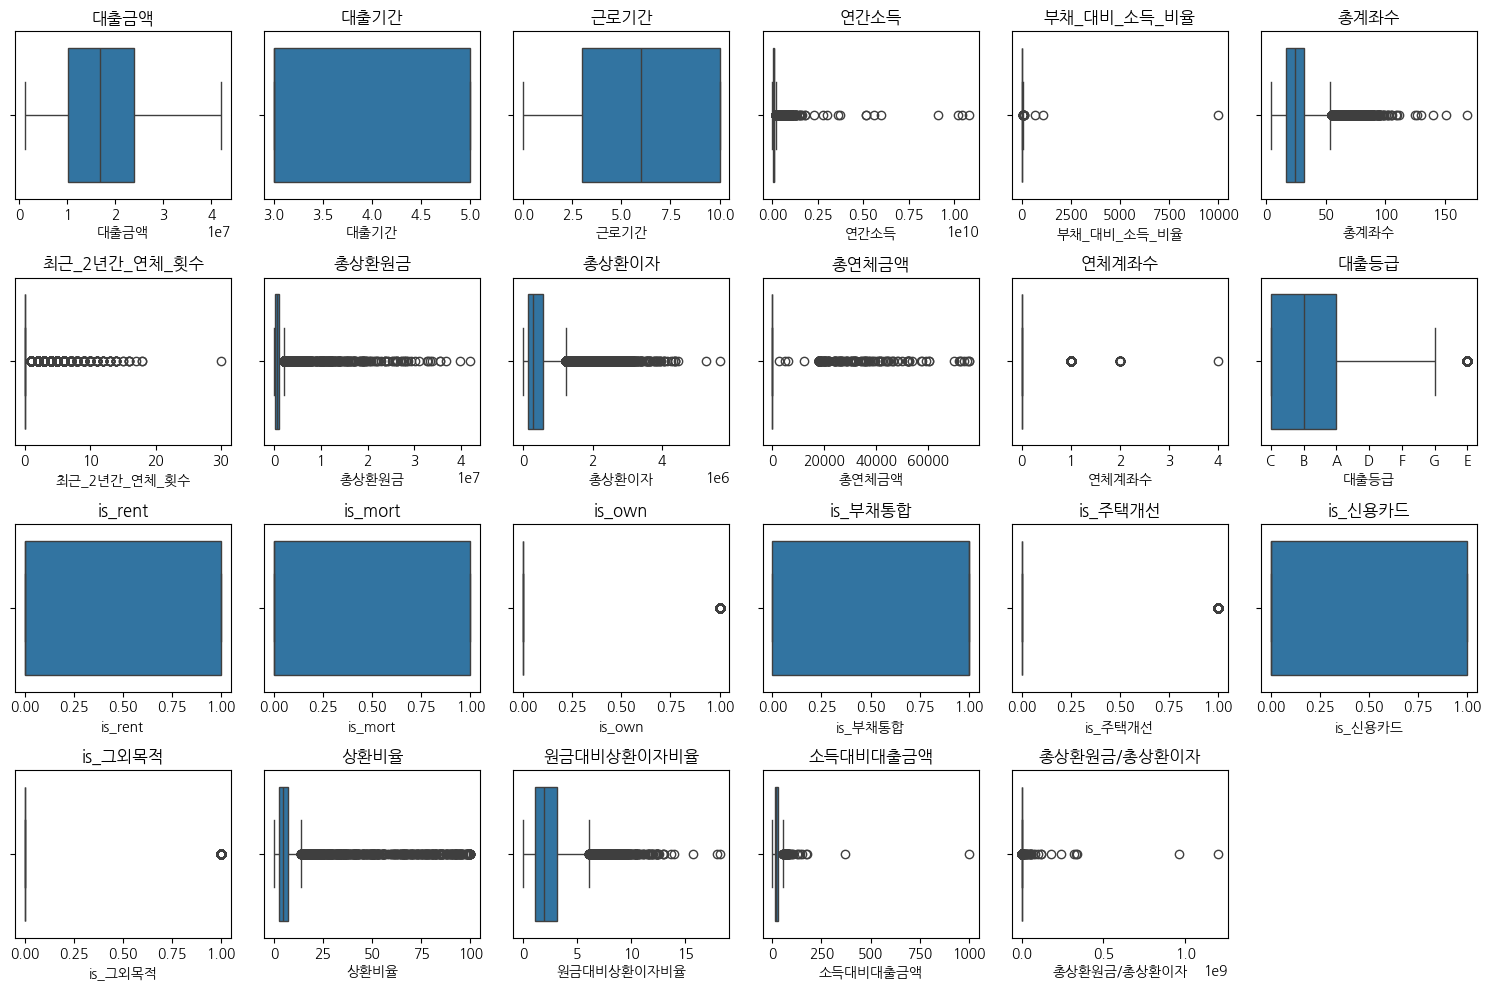

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# 박스플롯 그리기
plt.rcParams['font.family'] = 'NanumGothic'

plt.figure(figsize=(15, 10))
for i, column in enumerate(train.columns):
    plt.subplot(4, 6, i+1)
    sns.boxplot(x=train[column])
    plt.title(column)
plt.tight_layout()
plt.show()


In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

# 대출등급을 수치형으로 변환
label_encoder = LabelEncoder()
train['대출등급_encoded'] = label_encoder.fit_transform(train['대출등급'])

# 독립변수(X) 설정 (대출등급을 제외한 모든 열)
X = train.drop(['대출등급', '대출등급_encoded','is_rent','is_mort','is_own','is_부채통합','is_주택개선','is_그외목적'], axis=1)

# 종속변수(y) 설정 (대출등급_encoded)
y = train['대출등급_encoded']

# 회귀 분석 모델 학습
model = LinearRegression()
model.fit(X, y)

# 모델 평가 (예를 들어, R^2 값을 확인)
r_squared = model.score(X, y)
print("R^2:", r_squared)

R^2: 0.4605271335422816


In [11]:
test

,ID,대출금액,대출기간,근로기간,연간소득,부채_대비_소득_비율,총계좌수,최근_2년간_연체_횟수,총상환원금,총상환이자,...,is_mort,is_own,is_부채통합,is_주택개선,is_신용카드,is_그외목적,상환비율,원금대비상환이자비율,소득대비대출금액,총상환원금/총상환이자
0,TEST_00000,16800000,3,8.0,132000000,19.64,12,0,394692,146604.0,...,1,0,0,1,0,0,2.349357,0.872643,12.727273,2.349357
1,TEST_00001,8400000,3,5.0,89971200,15.84,25,0,0,0.0,...,0,0,1,0,0,0,0.000000,0.000000,9.336321,0.000000
2,TEST_00002,17280000,3,6.0,150000000,8.41,20,0,1786980,281820.0,...,0,0,0,0,1,0,10.341319,1.630903,11.520000,10.341319
3,TEST_00003,14400000,3,5.0,66000000,13.72,30,1,669024,281724.0,...,1,0,0,0,1,0,4.646000,1.956417,21.818182,4.646000
4,TEST_00004,27600000,3,5.0,55200000,30.50,12,0,1250052,614844.0,...,0,0,0,0,1,0,4.529174,2.227696,50.000000,4.529174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64192,TEST_64192,30000000,3,3.0,78000000,22.08,27,2,1307532,763380.0,...,1,0,1,0,0,0,4.358440,2.544600,38.461538,4.358440
64193,TEST_64193,30000000,5,10.0,109200000,12.06,26,0,960612,1245252.0,...,1,0,1,0,0,0,3.202040,4.150840,27.472527,3.202040
64194,TEST_64194,6120000,3,10.0,39600000,28.80,33,0,131520,80880.0,...,0,0,1,0,0,0,2.149020,1.321569,15.454545,2.149019
64195,TEST_64195,11520000,3,10.0,66000000,25.44,41,1,1339536,601872.0,...,1,0,1,0,0,0,11.627917,5.224583,17.454545,11.627916


## 모델링 XGBBoost 모델


In [12]:
train

,대출금액,대출기간,근로기간,연간소득,부채_대비_소득_비율,총계좌수,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,...,is_mort,is_own,is_부채통합,is_주택개선,is_신용카드,is_그외목적,상환비율,원금대비상환이자비율,소득대비대출금액,총상환원금/총상환이자
0,12480000,3,6.0,72000000,18.90,15,0,0,0.0,0.0,...,0,0,1,0,0,0,0.000000,0.000000,17.333333,0.000000
1,14400000,5,10.0,130800000,22.33,21,0,373572,234060.0,0.0,...,1,0,0,1,0,0,2.594250,1.625417,11.009174,159.604548
2,12000000,3,5.0,96000000,8.60,14,0,928644,151944.0,0.0,...,1,0,1,0,0,0,7.738700,1.266200,12.500000,611.171147
3,14400000,3,8.0,132000000,15.09,15,0,325824,153108.0,0.0,...,1,0,1,0,0,0,2.262667,1.063250,10.909091,212.805256
4,18000000,5,6.0,71736000,25.39,19,0,228540,148956.0,0.0,...,0,0,0,0,0,1,1.269667,0.827533,25.092004,153.426828
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96289,14400000,3,10.0,210000000,9.33,33,0,974580,492168.0,0.0,...,1,0,0,0,1,0,6.767917,3.417833,6.857143,198.017348
96290,28800000,5,10.0,132000000,5.16,25,0,583728,855084.0,0.0,...,1,0,0,1,0,0,2.026833,2.969042,21.818182,68.265494
96291,14400000,3,1.0,84000000,11.24,22,0,1489128,241236.0,0.0,...,1,0,0,0,1,0,10.341167,1.675250,17.142857,617.288393
96292,15600000,3,5.0,66330000,17.30,21,2,1378368,818076.0,0.0,...,1,0,1,0,0,0,8.835692,5.244077,23.518770,168.488785


In [13]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import f1_score

# 소득대비대출금액 열의 결측값을 0으로 대체
train['소득대비대출금액'].replace([np.inf, -np.inf], 0, inplace=True)

# 특성과 타겟 분할
X = train.drop(['대출등급'], axis = 1)
y = train['대출등급']

# 훈련 및 테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# 타겟 변수를 숫자형으로 변환
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# XGBoost 모델 훈련
model = XGBClassifier(max_depth=7,
                      random_state=42,
                      learning_rate=0.05,
                      objective='multi:softmax',
                      eval_metric='logloss')
model.fit(X_train, y_train_encoded)

# 테스트 데이터로 예측
pred = model.predict(X_test)

# 모델 평가
f1 = f1_score(y_test_encoded, pred, average='macro')
print("F1-score:", f1)


F1-score: 0.9210190970369776


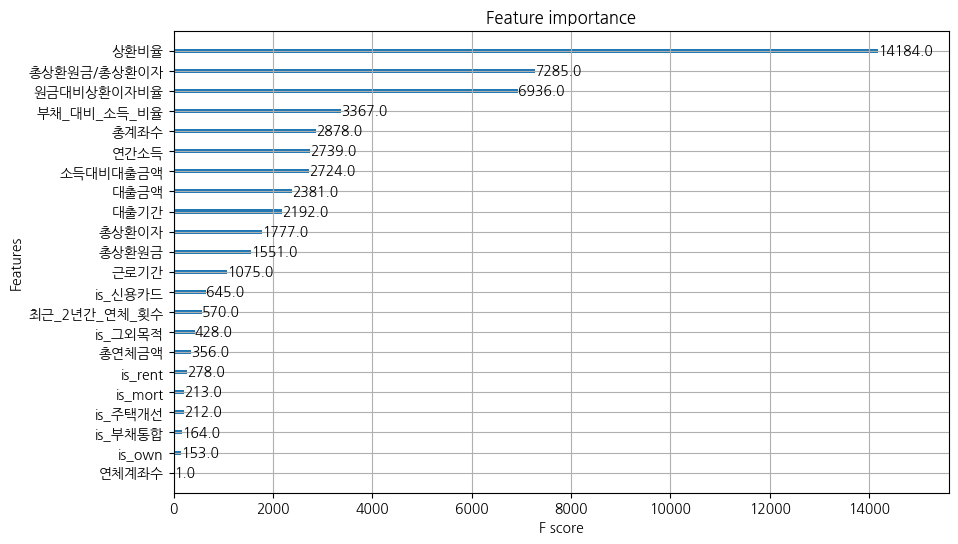

In [14]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams["figure.figsize"] = (10, 6)

plot_importance(model)
plt.show()


In [15]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

# test 데이터에 대해 동일한 전처리 수행
test['소득대비대출금액'].replace([np.inf, -np.inf], 0, inplace=True)
X_test = test.drop(['ID'], axis = 1)

# 테스트 데이터로 예측
pred_test = model.predict(X_test)

# 예측 결과를 데이터프레임으로 변환
result = pd.DataFrame({'ID': test['ID'], '대출등급': label_encoder.inverse_transform(pred_test)})

# 결과를 CSV 파일로 저장
result.to_csv('result.csv', index=False)  # 예시 파일명, 실제 파일명에 따라 수정 필요
result

,ID,대출등급
0,TEST_00000,C
1,TEST_00001,B
2,TEST_00002,C
3,TEST_00003,G
4,TEST_00004,C
...,...,...
64192,TEST_64192,G
64193,TEST_64193,D
64194,TEST_64194,C
64195,TEST_64195,D
